In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Temp Plot(2).csv')

In [3]:
data.head()

,Date,Rainfall(inch),Temperature(0.9m),Temperature(1.8m),Air Temp F,Air Temp C
0,10/3/2016,0.00,25.567,26.171,75.9,24.388889
1,10/4/2016,0.00,25.713,26.100,78.6,25.888889
2,10/5/2016,0.06,25.946,26.100,82.6,28.111111
3,10/6/2016,0.39,26.446,26.158,82.8,28.222222
4,10/7/2016,0.00,26.663,26.300,72.3,22.388889


In [4]:
data.isna().sum()

Date                   0
Rainfall(inch)         1
Temperature(0.9m)     12
Temperature(1.8m)    353
Air Temp F            11
Air Temp C            11
dtype: int64

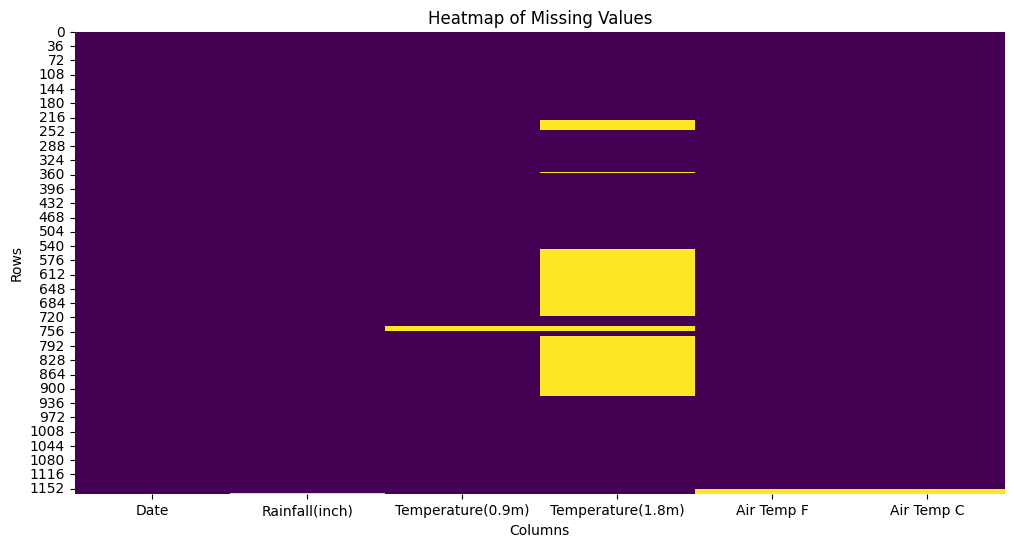

In [5]:
# Assuming the dataset is loaded into a DataFrame named 'data'
# Plot a heatmap of missing values
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

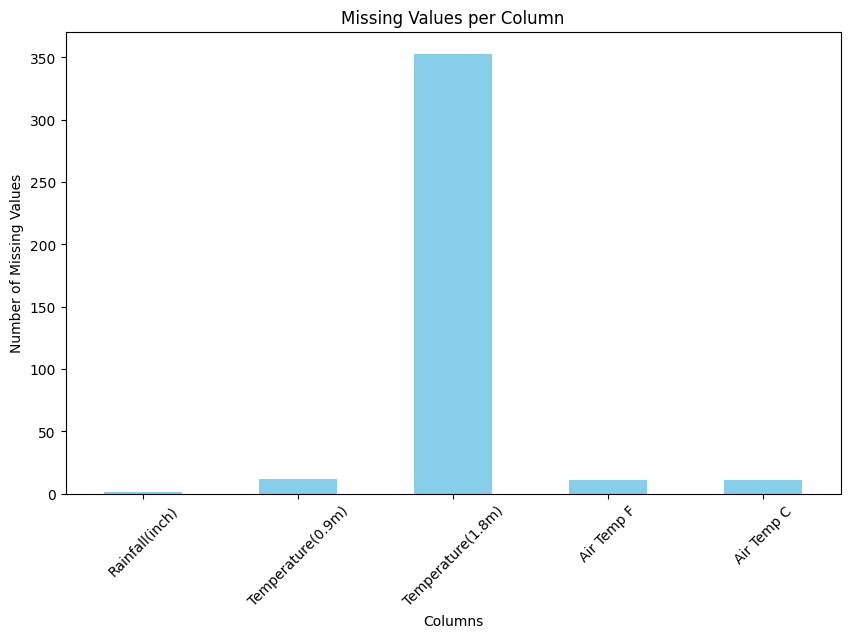

In [6]:
# Count missing values per column
missing_values = data.isnull().sum()

# Filter columns with missing values
missing_values = missing_values[missing_values > 0]

# Plot a bar chart
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title("Missing Values per Column")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45)
plt.show()

In [7]:
#Handling Missing values
# Mean imputation for missing values
data['Rainfall(inch)'].fillna(data['Rainfall(inch)'].mean(), inplace=True)
data['Temperature(0.9m)'].fillna(data['Temperature(0.9m)'].mean(), inplace=True)
data['Temperature(1.8m)'].fillna(data['Temperature(1.8m)'].mean(), inplace=True)
data['Air Temp F'].fillna(data['Air Temp F'].mean(), inplace=True)
data['Air Temp C'].fillna(data['Air Temp C'].mean(), inplace=True)

In [8]:
data.isna().sum()

Date                 0
Rainfall(inch)       0
Temperature(0.9m)    0
Temperature(1.8m)    0
Air Temp F           0
Air Temp C           0
dtype: int64

In [9]:
#creating day of year column

data['Date'] = pd.to_datetime(data['Date'])
data['day_of_year'] = data['Date'].dt.dayofyear

<Axes: >

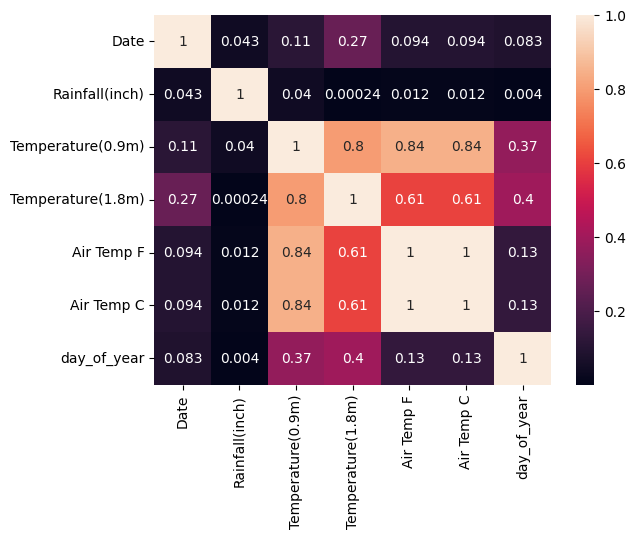

In [10]:
sns.heatmap(data.corr(),annot=True)

In [11]:
def remove_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]

In [12]:
cols=['Rainfall(inch)','Temperature(0.9m)','Temperature(1.8m)','Air Temp C','day_of_year']
data = remove_outliers(data, cols)

In [13]:
data.shape

(906, 7)

In [14]:
X = data[['Air Temp C', 'Rainfall(inch)', 'day_of_year']]
y = data['Temperature(0.9m)']

In [15]:
X.head()

,Air Temp C,Rainfall(inch),day_of_year
0,24.388889,0.0,277
1,25.888889,0.0,278
4,22.388889,0.0,281
5,18.666667,0.0,282
6,18.611111,0.0,283


In [16]:
y.head()

0    25.567
1    25.713
4    26.663
5    25.850
6    25.046
Name: Temperature(0.9m), dtype: float64

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X.shape,X_train.shape,X_test.shape

((906, 3), (724, 3), (182, 3))

In [19]:
#scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train

array([[-1.22598023,  0.        , -1.65058079],
       [ 0.74321485,  0.        ,  0.95869596],
       [-1.71514334,  0.        ,  1.33548683],
       ...,
       [ 1.05678094,  0.        ,  0.81739939],
       [ 0.29167967,  0.        , -0.86873974],
       [-1.30750742,  0.        , -1.44334582]])

In [21]:
X_test

array([[-7.18003156e-01,  0.00000000e+00,  9.02177331e-01],
       [-4.35793671e-01,  0.00000000e+00, -8.31060657e-01],
       [-1.47312864e-01,  0.00000000e+00,  1.40142523e+00],
       [ 1.53710588e-01,  0.00000000e+00, -6.04986137e-01],
       [ 1.12576548e+00,  0.00000000e+00,  1.67187936e-02],
       [ 1.21983531e+00,  0.00000000e+00,  5.63065551e-01],
       [ 1.72781239e+00,  0.00000000e+00,  1.10916510e-01],
       [ 2.66594382e-01,  0.00000000e+00,  5.81905094e-01],
       [-2.53318482e-02,  0.00000000e+00,  1.42026477e+00],
       [ 1.30763382e+00,  0.00000000e+00,  2.80472400e-01],
       [ 1.18220738e+00,  0.00000000e+00,  2.52213085e-01],
       [-2.53318482e-02,  0.00000000e+00,  1.44852409e+00],
       [-5.17320856e-01,  0.00000000e+00,  1.60866021e+00],
       [-2.41382692e-01,  0.00000000e+00, -9.81777003e-01],
       [-2.66467979e-01,  0.00000000e+00,  1.01521459e+00],
       [-1.37022063e+00,  0.00000000e+00,  1.28838797e+00],
       [-4.79692924e-01,  0.00000000e+00

In [23]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((724, 3), (182, 3), (724,), (182,))

In [25]:
##ANN Implementation

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

In [27]:
(X_train.shape[1],)

(3,)

In [28]:
#Build our model
model = Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)), ##HL1 connected with input layer
    Dense(32,activation='relu'),   #HL2
    Dense(1,activation='linear') # output layer

]
)

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,369 (9.25 KB)

 Trainable params: 2,369 (9.25 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

#loss
loss = tf.keras.losses.MeanSquaredError()

In [31]:
#Complie the model
model.compile(optimizer=opt,loss=loss,metrics=['mae'])

# model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [32]:
##setup the Tensorboard

log_dir = 'logs/fit/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorflow_callback = TensorBoard(log_dir=log_dir,histogram_freq=1)

In [33]:
## Setup early stopping
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [34]:
## Training the Model

history = model.fit(
    X_train,y_train,validation_data=(X_test,y_test),epochs=100,
    callbacks=[tensorflow_callback,early_stopping_callback],
    
)

# model.fit(X_train, y_train, epochs=100,batch_size=5,validation_split=0.2, verbose=1)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 363.6996 - mae: 17.5118 - val_loss: 42.2439 - val_mae: 5.5072
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30.1456 - mae: 4.3901 - val_loss: 17.5019 - val_mae: 3.2660
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.0572 - mae: 2.8628 - val_loss: 12.4307 - val_mae: 2.6782
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.9191 - mae: 2.4799 - val_loss: 10.5016 - val_mae: 2.5136
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.1686 - mae: 2.0810 - val_loss: 9.0536 - val_mae: 2.3425
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.2321 - mae: 2.1053 - val_loss: 7.9007 - val_mae: 2.1269
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.0877 - mae: 1.8492 - val_loss: 7.2303 - val_mae: 2.1079
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.2795 - mae: 1.7373 - val_loss: 6.2910 - val_mae: 1.9559
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - l

In [35]:
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss}, Test MAE: {mae}')

Test Loss: 2.1648664474487305, Test MAE: 1.1593852043151855


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


Text(0, 0.5, 'Predicted Values')

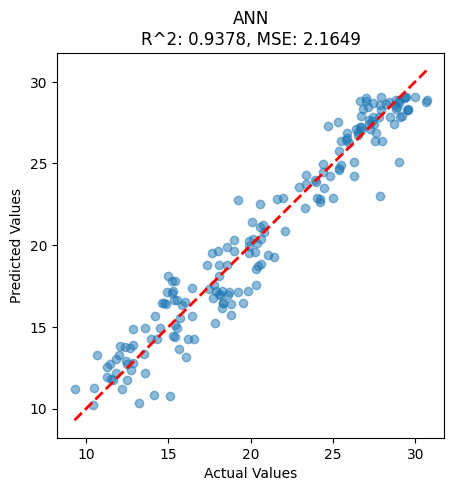

In [36]:
from sklearn.metrics import r2_score,mean_squared_error
y_pred = model.predict(X_test)
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f"ANN\nR^2: {r2_score(y_test, y_pred):.4f}, MSE: {mean_squared_error(y_test, y_pred):.4f}")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

In [37]:
# y_pred = model.predict(X_test)
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f"ANN\nR^2: {r2_score(y_test, y_pred):.4f}, MSE: {mean_squared_error(y_test, y_pred):.4f}")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.savefig('new_temp.png')
plt.close()

In [38]:
X.head()

,Air Temp C,Rainfall(inch),day_of_year
0,24.388889,0.0,277
1,25.888889,0.0,278
4,22.388889,0.0,281
5,18.666667,0.0,282
6,18.611111,0.0,283


In [39]:
y.head()

0    25.567
1    25.713
4    26.663
5    25.850
6    25.046
Name: Temperature(0.9m), dtype: float64

In [40]:
#inputs order - AirTemp C,radiation, day_of_year

new_data = np.array([[24.388889,0.0,277]])  # Example values
new_data_scaled = scaler.transform(new_data)
predicted_values = model.predict(new_data_scaled)
predicted_values

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[26.509712]], dtype=float32)

In [41]:
#Eqaution 

def expand_intermediate_equation(model):
    input_vars = ['Air Temp', 'Rainfall', 'day_of_year']  # Air Temp, Rainfall, day_of_year
    equation = input_vars
    
    final_equation = ""

    for i, layer in enumerate(model.layers):
        weights, biases = layer.get_weights()
        output_vars = []

        layer_equation = []
        for j in range(weights.shape[1]):
            terms = [f"({weights[k, j]:.3f} * {equation[k]})" for k in range(len(equation))]
            layer_equation.append(f"({' + '.join(terms)} + {biases[j]:.3f})")

        if layer.activation.__name__ == 'relu':
            layer_equation = [f"ReLU({eq})" for eq in layer_equation]
        equation = layer_equation
        if i == len(model.layers) - 1:
            final_equation = equation[0]

    print(f"Final Expanded Equation: \nOutput = {final_equation}")

expand_intermediate_equation(model)

Final Expanded Equation: 
Output = ((0.385 * ReLU(((0.394 * ReLU(((-0.087 * Air Temp) + (0.023 * Rainfall) + (-0.061 * day_of_year) + 0.360))) + (0.154 * ReLU(((-0.192 * Air Temp) + (0.133 * Rainfall) + (-0.179 * day_of_year) + 0.426))) + (0.361 * ReLU(((-0.107 * Air Temp) + (-0.197 * Rainfall) + (-0.118 * day_of_year) + 0.342))) + (-0.028 * ReLU(((-0.101 * Air Temp) + (-0.255 * Rainfall) + (-0.058 * day_of_year) + 0.354))) + (0.435 * ReLU(((0.071 * Air Temp) + (-0.239 * Rainfall) + (0.029 * day_of_year) + 0.329))) + (0.251 * ReLU(((0.021 * Air Temp) + (0.258 * Rainfall) + (0.127 * day_of_year) + 0.215))) + (-0.251 * ReLU(((0.027 * Air Temp) + (0.281 * Rainfall) + (-0.748 * day_of_year) + 0.109))) + (0.026 * ReLU(((0.155 * Air Temp) + (0.010 * Rainfall) + (0.009 * day_of_year) + 0.400))) + (0.203 * ReLU(((-0.156 * Air Temp) + (-0.174 * Rainfall) + (0.259 * day_of_year) + 0.440))) + (0.367 * ReLU(((-0.214 * Air Temp) + (-0.192 * Rainfall) + (0.195 * day_of_year) + 0.390))) + (0.168 * Re

In [42]:
model.save("new_temp.h5") 

In [43]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
# Evaluate the model
# y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

Mean Squared Error: 2.1649
Mean Absolute Error: 1.1594
R² Score: 0.9378


Text(0.5, 0, 'Actual Values')

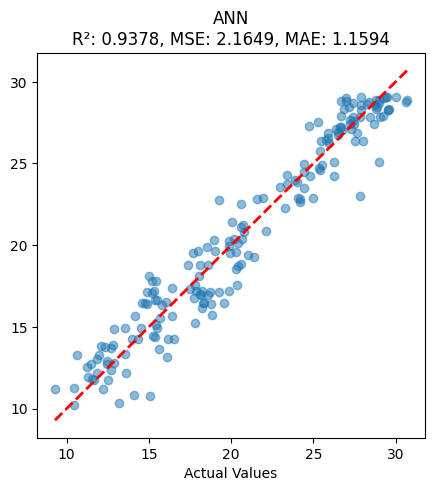

In [44]:
#plot measured and predicted

plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f"ANN\nR²: {r2:.4f}, MSE: {mse:.4f}, MAE: {mae:.4f}")
plt.xlabel("Actual Values")


In [45]:
data.head()

,Date,Rainfall(inch),Temperature(0.9m),Temperature(1.8m),Air Temp F,Air Temp C,day_of_year
0,2016-10-03,0.0,25.567,26.171,75.9,24.388889,277
1,2016-10-04,0.0,25.713,26.100,78.6,25.888889,278
4,2016-10-07,0.0,26.663,26.300,72.3,22.388889,281
5,2016-10-08,0.0,25.850,26.258,65.6,18.666667,282
6,2016-10-09,0.0,25.046,25.929,65.5,18.611111,283


In [46]:
y_test

1103    27.833
554     16.400
426     18.075
943     19.879
1009    26.517
         ...  
763     18.971
1100    28.996
561     17.354
1010    26.708
29      24.200
Name: Temperature(0.9m), Length: 182, dtype: float64

In [47]:
X.head()

,Air Temp C,Rainfall(inch),day_of_year
0,24.388889,0.0,277
1,25.888889,0.0,278
4,22.388889,0.0,281
5,18.666667,0.0,282
6,18.611111,0.0,283


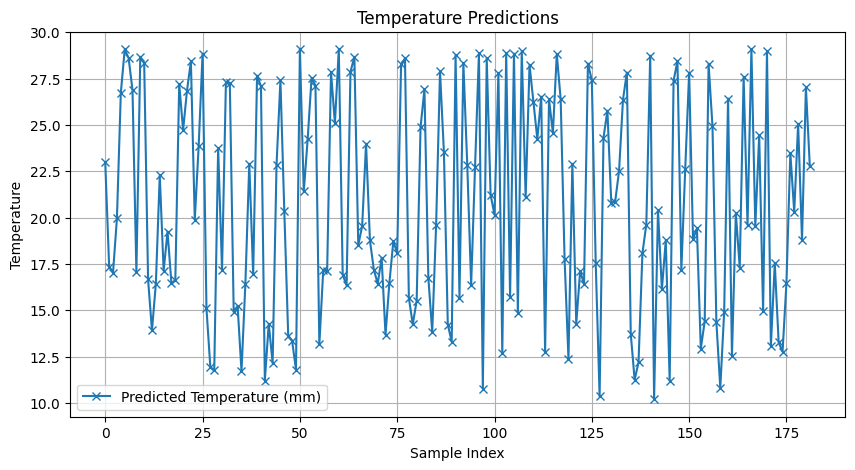

In [52]:
# Optional: Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
# plt.plot(y_train, label='True Temperature (mm)', linestyle='dotted', marker='o')
plt.plot(y_pred, label='Predicted Temperature (mm)', linestyle='solid', marker='x')
# plt.plot(y_pred.flatten(), label='Predicted Temperature (ft)', linestyle='dashed', marker='s')
plt.title('Temperature Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Temperature')
plt.legend()
plt.grid()
plt.show()


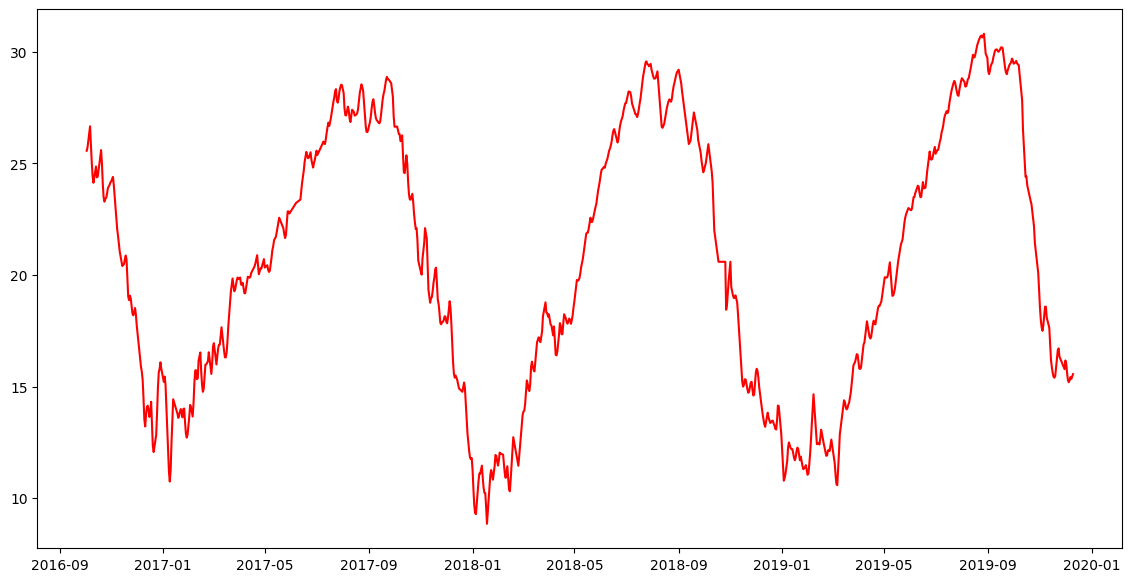

In [54]:
#Trainging
plt.figure(figsize=(14, 7))
plt.plot(data['Date'],data['Temperature(0.9m)'],c='r')

Text(0, 0.5, 'Temperature')

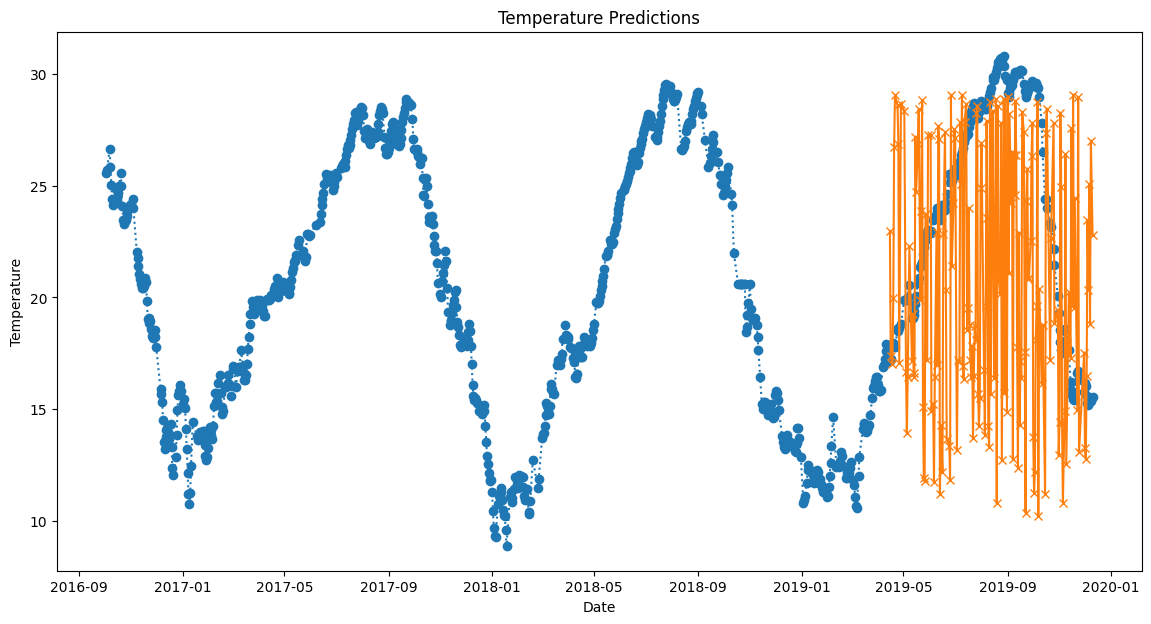

In [55]:
#Prediction

plt.figure(figsize=(14, 7))

plt.plot(data['Date'],data['Temperature(0.9m)'], label='True Temperature (mm)', linestyle='dotted', marker='o')

plt.plot(data['Date'].iloc[-len(y_pred):], y_pred.flatten(), label='Predicted Temperature (mm)', linestyle='solid', marker='x')

plt.title('Temperature Predictions')

plt.xlabel('Date')  

plt.ylabel('Temperature')

## validation datset

In [83]:
valid_data = pd.read_csv("Validation Dataset.csv")

In [84]:
valid_data.head()

,SI,Date,Unnamed: 2,Temperature_1ft (0.3m),Temperature2ft (0.6m),Temperature3ft (0.91m),Temperature4ft (1.21m),rainfall (mm),Air Temp,Air Temp C
0,1,05-01-2019,NaN,8.43,8.24,8.00,7.60,1.778,48.8,9.333
1,2,05-02-2019,NaN,8.95,8.36,8.01,7.60,4.826,53.7,12.056
2,3,05-03-2019,NaN,10.19,8.95,8.22,7.65,3.810,55.6,13.111
3,4,05-04-2019,NaN,11.24,9.67,8.62,7.78,8.128,53.3,11.833
4,5,05-05-2019,NaN,12.02,10.34,9.09,7.98,0.000,52.3,11.278


In [85]:
valid_data.drop(columns=['SI','Unnamed: 2','Air Temp'],axis=1,inplace=True)

In [86]:
valid_data.head()

,Date,Temperature_1ft (0.3m),Temperature2ft (0.6m),Temperature3ft (0.91m),Temperature4ft (1.21m),rainfall (mm),Air Temp C
0,05-01-2019,8.43,8.24,8.00,7.60,1.778,9.333
1,05-02-2019,8.95,8.36,8.01,7.60,4.826,12.056
2,05-03-2019,10.19,8.95,8.22,7.65,3.810,13.111
3,05-04-2019,11.24,9.67,8.62,7.78,8.128,11.833
4,05-05-2019,12.02,10.34,9.09,7.98,0.000,11.278


In [87]:
# Convert 'Date' to datetime 
valid_data['Date'] = pd.to_datetime(valid_data['Date'], errors='coerce')

# Create the 'day_of_year' column
valid_data['day_of_year'] = valid_data['Date'].dt.dayofyear


In [88]:
valid_data.head()

,Date,Temperature_1ft (0.3m),Temperature2ft (0.6m),Temperature3ft (0.91m),Temperature4ft (1.21m),rainfall (mm),Air Temp C,day_of_year
0,2019-05-01,8.43,8.24,8.00,7.60,1.778,9.333,121.0
1,2019-05-02,8.95,8.36,8.01,7.60,4.826,12.056,122.0
2,2019-05-03,10.19,8.95,8.22,7.65,3.810,13.111,123.0
3,2019-05-04,11.24,9.67,8.62,7.78,8.128,11.833,124.0
4,2019-05-05,12.02,10.34,9.09,7.98,0.000,11.278,125.0


In [89]:
valid_data['Rainfall(inch)'] = valid_data['rainfall (mm)'] * 0.0393701

In [90]:
valid_data.drop(columns=['rainfall (mm)'],axis=1,inplace=True)

In [91]:
valid_data.head()

,Date,Temperature_1ft (0.3m),Temperature2ft (0.6m),Temperature3ft (0.91m),Temperature4ft (1.21m),Air Temp C,day_of_year,Rainfall(inch)
0,2019-05-01,8.43,8.24,8.00,7.60,9.333,121.0,0.07
1,2019-05-02,8.95,8.36,8.01,7.60,12.056,122.0,0.19
2,2019-05-03,10.19,8.95,8.22,7.65,13.111,123.0,0.15
3,2019-05-04,11.24,9.67,8.62,7.78,11.833,124.0,0.32
4,2019-05-05,12.02,10.34,9.09,7.98,11.278,125.0,0.00


In [93]:
X = valid_data[['Air Temp C','Rainfall(inch)','day_of_year']]

X.head()

,Air Temp C,Rainfall(inch),day_of_year
0,9.333,0.07,121.0
1,12.056,0.19,122.0
2,13.111,0.15,123.0
3,11.833,0.32,124.0
4,11.278,0.00,125.0


In [94]:
#Standardization

validation_data_scaled = scaler.transform(X)

In [95]:
#prediction

predicted_valid_values = model.predict(validation_data_scaled)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [96]:
predicted_valid_values

array([[17.7206   ],
       [17.88041  ],
       [18.193363 ],
       ...,
       [ 2.4185076],
       [ 2.4185076],
       [ 2.4185076]], dtype=float32)

In [97]:
predicted_valid_values[0]

array([17.7206], dtype=float32)

In [98]:
#creating dataframe for predicted values
df = pd.DataFrame(predicted_valid_values, columns=['Temp_Pred(0.9m)'])

In [99]:
df.head()

,Temp_Pred(0.9m)
0,17.720600
1,17.880409
2,18.193363
3,17.723263
4,18.400023


In [100]:
#concate both dataframes

valid = pd.concat([X, df], axis=1)

In [101]:
valid.head()

,Air Temp C,Rainfall(inch),day_of_year,Temp_Pred(0.9m)
0,9.333,0.07,121.0,17.720600
1,12.056,0.19,122.0,17.880409
2,13.111,0.15,123.0,18.193363
3,11.833,0.32,124.0,17.723263
4,11.278,0.00,125.0,18.400023


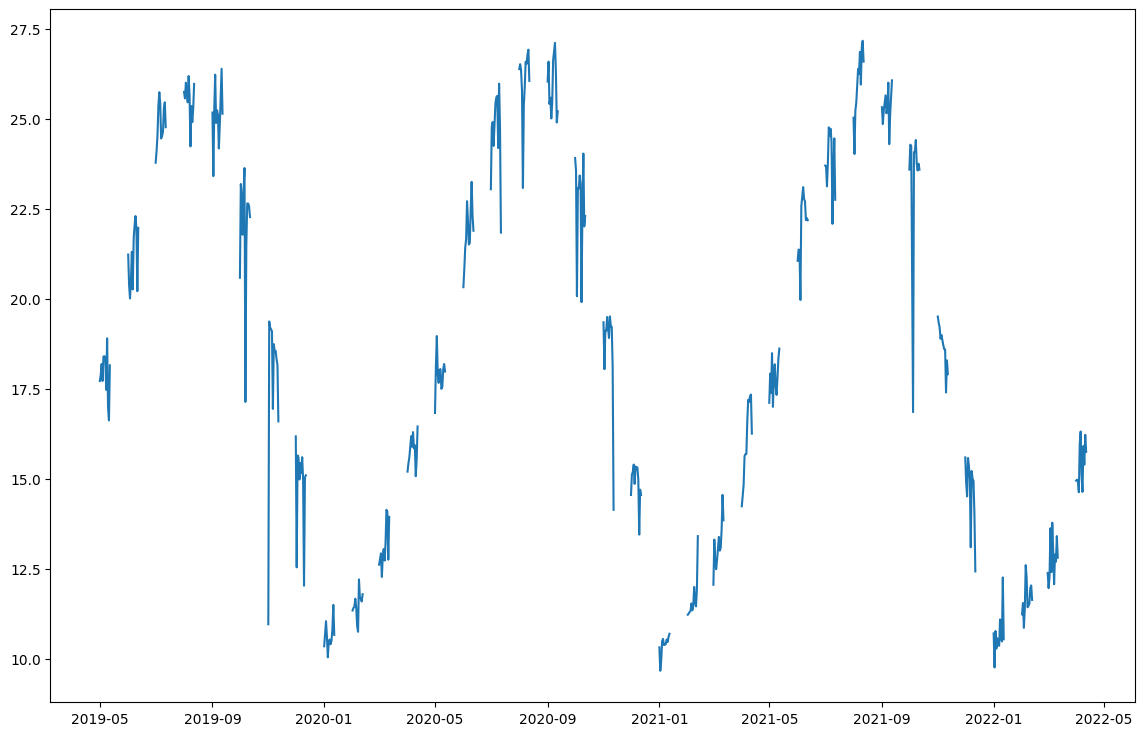

In [108]:
plt.figure(figsize=(14,9))
plt.plot(valid_data['Date'],valid['Temp_Pred(0.9m)'],)

In [102]:
valid_data.head()

,Date,Temperature_1ft (0.3m),Temperature2ft (0.6m),Temperature3ft (0.91m),Temperature4ft (1.21m),Air Temp C,day_of_year,Rainfall(inch)
0,2019-05-01,8.43,8.24,8.00,7.60,9.333,121.0,0.07
1,2019-05-02,8.95,8.36,8.01,7.60,12.056,122.0,0.19
2,2019-05-03,10.19,8.95,8.22,7.65,13.111,123.0,0.15
3,2019-05-04,11.24,9.67,8.62,7.78,11.833,124.0,0.32
4,2019-05-05,12.02,10.34,9.09,7.98,11.278,125.0,0.00


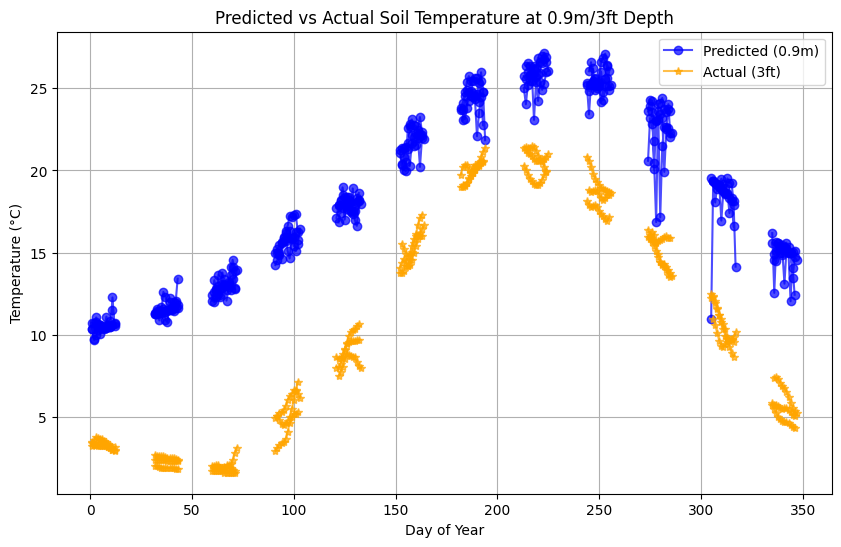

In [109]:
import matplotlib.pyplot as plt
# Plotting the data
plt.figure(figsize=(10, 6))
# plt.plot(X["day_of_year"], X["Temp_Pred(0.9m)"], label="Predicted (0.9m)")
# plt.plot(data["day_of_year"], data["Temperature3ft (0.91m)"], label="Actual (3ft)")
plt.plot(valid["day_of_year"], valid["Temp_Pred(0.9m)"], label="Predicted (0.9m)", color='blue', alpha=0.7,marker='o')
plt.plot(valid_data["day_of_year"], valid_data["Temperature3ft (0.91m)"], label="Actual (3ft)", color='orange', alpha=0.7,marker='*')
plt.title("Predicted vs Actual Soil Temperature at 0.9m/3ft Depth")
plt.xlabel("Day of Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid()
plt.show()

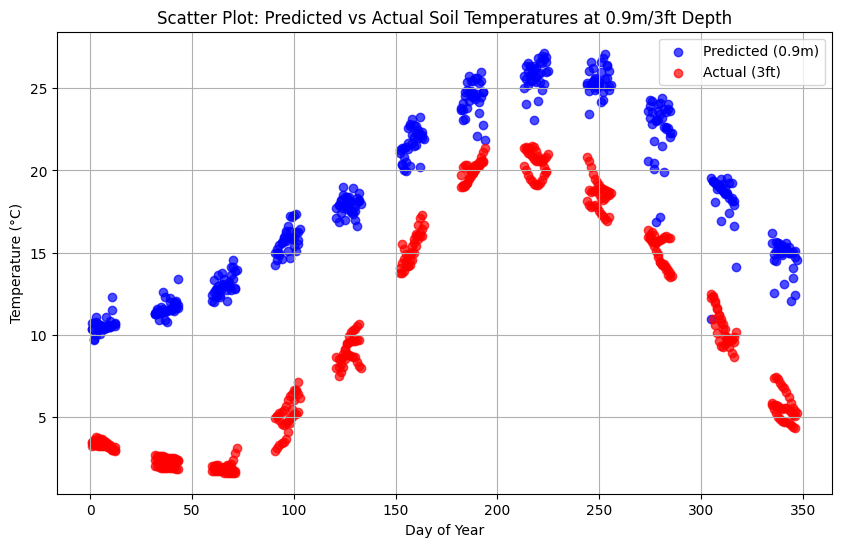

In [110]:
# Creating a scatter plot for comparison
plt.figure(figsize=(10, 6))
# Scatter plot for Predicted and Actual data
plt.scatter(valid["day_of_year"], valid["Temp_Pred(0.9m)"], label="Predicted (0.9m)", color='blue', alpha=0.7)
plt.scatter(valid_data["day_of_year"], valid_data["Temperature3ft (0.91m)"], label="Actual (3ft)", color='red', alpha=0.7)
# Adding titles and labels
plt.title("Scatter Plot: Predicted vs Actual Soil Temperatures at 0.9m/3ft Depth")
plt.xlabel("Day of Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid()

plt.show()


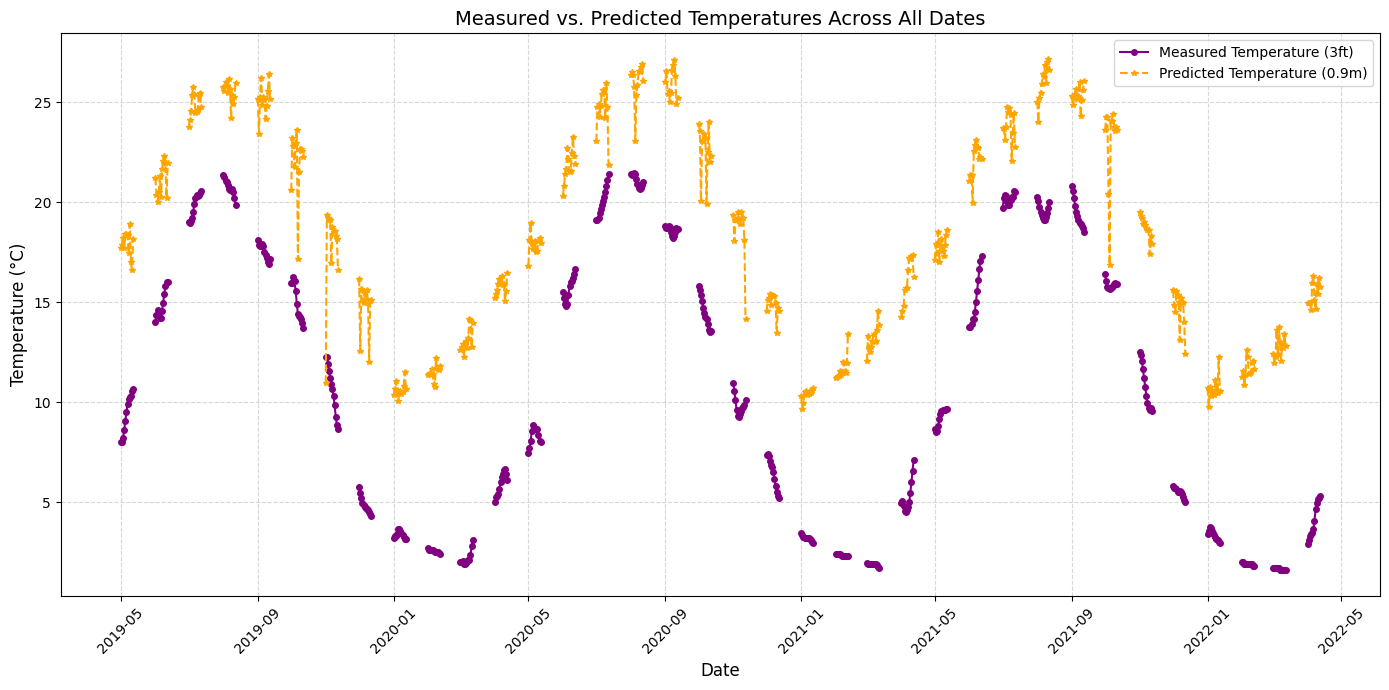

In [112]:
# Extracting necessary columns as numpy arrays
y_test = np.array(valid_data[["Temperature3ft (0.91m)"]])
y_pred = np.array(valid[["Temp_Pred(0.9m)"]])

# Plot for Measured vs. Predicted Temperatures at 0.9m for all years
plt.figure(figsize=(14, 7))

# Plotting Measured Temperatures for 3ft
plt.plot(valid_data['Date'], y_test[:, 0], label='Measured Temperature (3ft)', color='purple', linestyle='-', marker='o', markersize=4)

# Plotting Predicted Temperatures for 0.9m
plt.plot(valid_data['Date'], y_pred[:, 0], label='Predicted Temperature (0.9m)', color='orange', linestyle='--', marker='*', markersize=4)

# Customizing the plot
plt.title('Measured vs. Predicted Temperatures Across All Dates', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [118]:
valid_data.head(2)

,Date,Temperature_1ft (0.3m),Temperature2ft (0.6m),Temperature3ft (0.91m),Temperature4ft (1.21m),Air Temp C,day_of_year,Rainfall(inch)
0,2019-05-01,8.43,8.24,8.00,7.6,9.333,121.0,0.07
1,2019-05-02,8.95,8.36,8.01,7.6,12.056,122.0,0.19


In [117]:
data.head()

,Date,Rainfall(inch),Temperature(0.9m),Temperature(1.8m),Air Temp F,Air Temp C,day_of_year
0,2016-10-03,0.0,25.567,26.171,75.9,24.388889,277
1,2016-10-04,0.0,25.713,26.100,78.6,25.888889,278
4,2016-10-07,0.0,26.663,26.300,72.3,22.388889,281
5,2016-10-08,0.0,25.850,26.258,65.6,18.666667,282
6,2016-10-09,0.0,25.046,25.929,65.5,18.611111,283


In [115]:
valid.head( )

,Air Temp C,Rainfall(inch),day_of_year,Temp_Pred(0.9m)
0,9.333,0.07,121.0,17.720600
1,12.056,0.19,122.0,17.880409
2,13.111,0.15,123.0,18.193363
3,11.833,0.32,124.0,17.723263
4,11.278,0.00,125.0,18.400023


conclusion:

 The above two datasets are differnet region

Focus on thre features (Air Temp C,day_of_year,Rainfall(inch)) if we see from two datasets it has huge difference 

the validation data is predicted by model that trained with Tempplot dataset 
thats way we are gettion little diffence in predicting temperatures -->

The model is able to predict temperatures with reasonable accuracy. However, it would be beneficial to analyze the performance of the model on the validation dataset to ensure it generalizes well to unseen data.

If we want to predict the temperatures for the entire year 2023, we would need to train the model with the entire dataset, including the validation dataset. This would help the model to capture more patterns and make more accurate predictions.

Please note that the model was trained on a small dataset, which might not be representative of the entirety of the region. Additionally, the validation dataset is not included in the training process, which could lead to overfitting. It would be beneficial to cross-validate the model using a separate validation dataset to ensure its robustness.

Overall, the model is able to provide reasonable predictions for temperatures at different depths in the soil, but it would be beneficial to conduct further analysis and validation to ensure its accuracy and reliability.